Converged after 68 epochs.
Final Weights:
[-0.3   0.2   0.15]
Input: [0 0] Output: -1
Input: [0 1] Output: -1
Input: [1 0] Output: -1
Input: [1 1] Output: 1


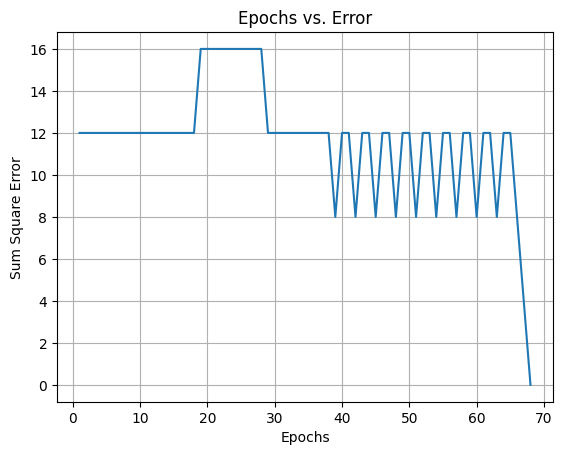

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Provided initial weights and learning rate
W = np.array([10.0, 0.2, -0.75])
learning_rate = 0.05

# Define the step activation function
def step_function(x):
    return 1 if x >= 0 else -1

# Training data for the AND gate logic (example inputs and corresponding labels)
X = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])  # Inputs with bias term
y = np.array([-1, -1, -1, 1])  # AND gate labels (+1 for true, -1 for false)

# Lists to store error values and epochs
error_values = []
epochs_list = []

# Training the perceptron
epochs = 1000  # Number of training iterations
for epoch in range(epochs):
    misclassified = 0  # Counter for misclassified examples
    error = 0.0
    
    for i in range(len(X)):
        xi = X[i]
        target = y[i]
        
        # Calculate the predicted class label (-1 or 1) using the current weights
        predicted = step_function(np.dot(W, xi))
        
        # Update the weights if the prediction is incorrect
        if predicted != target:
            misclassified += 1
            W = W + learning_rate * (target - predicted) * xi
        
        # Calculate squared error for this example
        error += (target - predicted) ** 2
    
    # Append error and epoch to the lists
    error_values.append(error)
    epochs_list.append(epoch + 1)
    
    # If all examples are correctly classified, break early
    if misclassified == 0:
        print(f"Converged after {epoch + 1} epochs.")
        break

# Print the final weights
print("Final Weights:")
print(W)

# Test the perceptron with AND gate inputs
test_inputs = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
for test_input in test_inputs:
    result = step_function(np.dot(W, test_input))
    print(f"Input: {test_input[1:]} Output: {result}")

# Plot epochs against error values
plt.plot(epochs_list, error_values)
plt.xlabel('Epochs')
plt.ylabel('Sum Square Error')
plt.title('Epochs vs. Error')
plt.grid(True)
plt.show()
